In [113]:
# Dependencies 
import numpy as np
import pandas as pd

# plotlib
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [114]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [115]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [116]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June.
june_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()

In [117]:
#  3. Convert the June temperatures to a list.
june_temps = list(june_temps)

In [118]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temps, columns=['date','jun_temp'])
june_temp_df.set_index(june_temp_df['date'], inplace=True)
june_temp_df = june_temp_df.sort_index()
june_temp_df


,date,jun_temp
date,,
2010-06-01,2010-06-01,78.0
2010-06-01,2010-06-01,73.0
2010-06-01,2010-06-01,77.0
2010-06-01,2010-06-01,69.0
2010-06-01,2010-06-01,76.0
...,...,...
2017-06-30,2017-06-30,76.0
2017-06-30,2017-06-30,75.0
2017-06-30,2017-06-30,75.0


In [129]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
print(session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(extract('month', Measurement.date)==6).all())

june_temp_df.describe()

[(64.0, 85.0, 74.94411764705882)]


,jun_temp
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


<AxesSubplot:xlabel='date'>

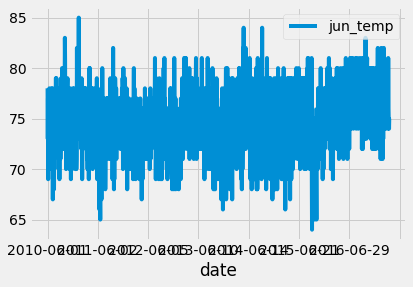

In [120]:
#plot june temps
june_temp_df.plot()

## D2: Determine the Summary Statistics for December

In [121]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()
#print(dec_temps)

In [122]:
# 7. Convert the December temperatures to a list.
dec_temps = list(dec_temps)

In [123]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df = pd.DataFrame(dec_temps, columns=['date','dec_temp'])
dec_temp_df.set_index(dec_temp_df['date'], inplace=True)
dec_temp_df = dec_temp_df.sort_index()
dec_temp_df

,date,dec_temp
date,,
2010-12-01,2010-12-01,76.0
2010-12-01,2010-12-01,73.0
2010-12-01,2010-12-01,72.0
2010-12-01,2010-12-01,78.0
2010-12-01,2010-12-01,72.0
...,...,...
2016-12-31,2016-12-31,67.0
2016-12-31,2016-12-31,72.0
2016-12-31,2016-12-31,66.0


In [131]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
print(session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(extract('month', Measurement.date)==12).all())

dec_temp_df.describe()


[(56.0, 83.0, 71.04152933421226)]


,dec_temp
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<AxesSubplot:xlabel='date'>

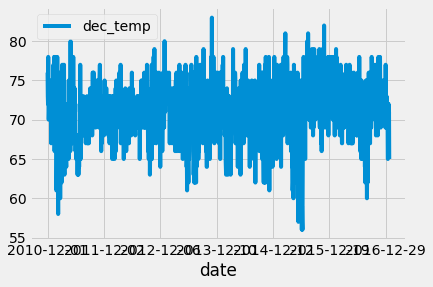

In [125]:
#plot to see any trends
dec_temp_df.plot()